<a href="https://colab.research.google.com/github/rowida2/recommendation-system-project/blob/main/Travel_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

build a travel recommendation system with the provided datasets focusing on content-based filtering, collaborative filtering, and hybrid models.

# Import Libraries and Data

In [2]:
from google.colab import files

uploaded = files.upload()

Saving places.csv to places.csv
Saving reviews.csv to reviews.csv
Saving user_history.csv to user_history.csv
Saving users.csv to users.csv


In [25]:
from google.colab import files

uploaded = files.upload()

Saving df.csv to df.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
destinations_df = pd.read_csv("places.csv")
reviews_df = pd.read_csv("reviews.csv")
userhistory_df = pd.read_csv("user_history.csv")
users_df = pd.read_csv("users.csv")

In [4]:
destinations_df.head()

,place_id,name,city,category,best_time_to_visit,popularity,tags
0,1,Blue Healing Springs of Giza,Giza,medical,Year-round,High,"mineral water, wellness, therapy, massage"
1,2,Dahab Pharaonic Site,Dahab,historical,Winter-Spring,Low,"sculpture, cultural, historic, museum"
2,3,Edfu Nature Reserve,Edfu,adventure,Oct-Apr,Low,"adventure, camping, exploration"
3,4,Minya Archaeological Site,Minya,historical,Winter (Nov-Feb),Medium,"roman, pharaonic, museum, heritage, islamic"
4,5,Port Said Pyramids,Port Said,historical,Spring (Mar-May),Low,"pharaonic, cultural, historic, museum, islamic"


In [5]:
reviews_df.head()

,review_id,destination_id,user_id,rate,review_text
0,1,181,927,5,Fantastic experience! The spa was gorgeous. Th...
1,2,84,321,4,Really enjoyed our visit to this wellness cent...
2,3,878,561,5,Outstanding! This mountain is a must-visit. Ev...
3,4,381,1182,4,Really enjoyed our visit to this retreat. Grea...
4,5,1423,1454,3,Middle of the road. The museum was tolerable. ...


In [6]:
userhistory_df.head()

,history_id,user_id,destination_id,experience_rate
0,1,1444,103,4
1,2,261,258,5
2,3,348,782,4
3,4,196,470,4
4,5,146,928,4


In [7]:
users_df.head()

,user_id,name,email,preference,gender,NumOfAdults,NumOfChildren
0,1,Tarek Hassan,tarek_hassan@yahoo.com,"adventure, beach, historical",male,1,1
1,2,Youssef Hassan,youssef.hassan@yahoo.com,"beach, historical",male,3,2
2,3,Ashraf Farid,ashraf.farid@hotmail.com,beach,male,1,1
3,4,Menna Hassan,mennahassan@outlook.com,"historical, beach",female,3,0
4,5,Wael Ramadan,wramadan@gmail.com,"historical, beach",male,2,3


In [8]:
# Merge datasets
# Merge reviews with destinations on 'DestinationID'
reviews_destinations = pd.merge(reviews_df, destinations_df, left_on='destination_id', right_on='place_id', how='inner')

# Merge the result with user history on 'UserID'
reviews_destinations_userhistory = pd.merge(reviews_destinations, userhistory_df, on='user_id', how='inner')

# Merge the result with users on 'UserID'
df = pd.merge(reviews_destinations_userhistory, users_df, on='user_id', how='inner')

df

,review_id,destination_id_x,user_id,rate,review_text,place_id,name_x,city,category,best_time_to_visit,...,tags,history_id,destination_id_y,experience_rate,name_y,email,preference,gender,NumOfAdults,NumOfChildren
0,11,944,197,3,Neutral feelings about this beach. Not bad but...,944,Paradise Hot Springs of Ismailia,Ismailia,medical,Year-round,...,"wellness, yoga, therapy",63,1034,3,Amr Emad,aemad@hotmail.com,"beach, adventure, historical",male,3,0
1,11,944,197,3,Neutral feelings about this beach. Not bad but...,944,Paradise Hot Springs of Ismailia,Ismailia,medical,Year-round,...,"wellness, yoga, therapy",143,33,4,Amr Emad,aemad@hotmail.com,"beach, adventure, historical",male,3,0
2,11,944,197,3,Neutral feelings about this beach. Not bad but...,944,Paradise Hot Springs of Ismailia,Ismailia,medical,Year-round,...,"wellness, yoga, therapy",176,743,4,Amr Emad,aemad@hotmail.com,"beach, adventure, historical",male,3,0
3,11,944,197,3,Neutral feelings about this beach. Not bad but...,944,Paradise Hot Springs of Ismailia,Ismailia,medical,Year-round,...,"wellness, yoga, therapy",189,899,4,Amr Emad,aemad@hotmail.com,"beach, adventure, historical",male,3,0
4,11,944,197,3,Neutral feelings about this beach. Not bad but...,944,Paradise Hot Springs of Ismailia,Ismailia,medical,Year-round,...,"wellness, yoga, therapy",293,1451,3,Amr Emad,aemad@hotmail.com,"beach, adventure, historical",male,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1489,807,60,4,Good visit overall. The desert was lovely. Som...,807,Golden Nature Reserve of Luxor,Luxor,adventure,Winter (Nov-Feb),...,"exploration, extreme, adrenaline",909,861,5,Yasmine Gaber,yasmine_gaber@outlook.com,adventure,female,2,1
1541,1489,807,60,4,Good visit overall. The desert was lovely. Som...,807,Golden Nature Reserve of Luxor,Luxor,adventure,Winter (Nov-Feb),...,"exploration, extreme, adrenaline",1204,1483,4,Yasmine Gaber,yasmine_gaber@outlook.com,adventure,female,2,1
1542,1491,771,874,5,Five stars without a doubt! This reserve is sp...,771,Crystal Heritage Site of Nuweiba,Nuweiba,historical,Oct-Apr,...,"art, archaeological, heritage, monuments, coptic",247,1203,4,Ramy Hassan,ramyhassan@yahoo.com,"beach, medical",male,3,3
1543,1492,335,1261,5,One of the best places I've ever visited! The ...,335,Mansoura Coral Reef,Mansoura,beach,Spring-Fall,...,"kayaking, diving, coral reefs",947,118,5,Rana Hamdy,rana_hamdy@outlook.com,"medical, adventure",female,3,1


# 2 Data Preprocessing

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(1545, 21)

## Visualization

/tmp/ipython-input-140249273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity_score', y='name', data=top_destinations, palette='viridis')


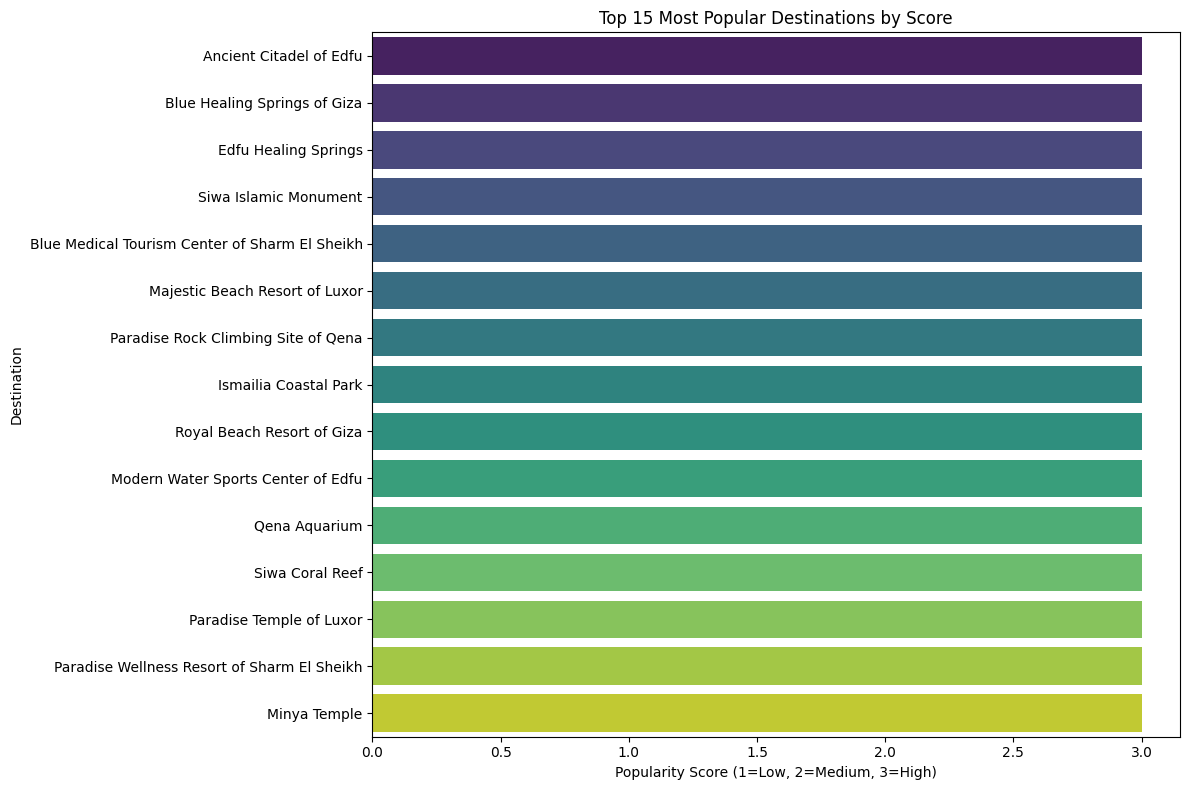

In [10]:
# Map popularity levels to numerical values
popularity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
destinations_df['popularity_score'] = destinations_df['popularity'].map(popularity_mapping)

# Sort by popularity_score
top_n = 15
top_destinations = destinations_df.sort_values(by='popularity_score', ascending=False).head(top_n)

plt.figure(figsize=(12, 8))
# horizontal bar plot for better readability
sns.barplot(x='popularity_score', y='name', data=top_destinations, palette='viridis')
plt.title(f'Top {top_n} Most Popular Destinations by Score')
plt.xlabel('Popularity Score (1=Low, 2=Medium, 3=High)')
plt.ylabel('Destination')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3335337517.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Category', data=plot_df, palette='Spectral')


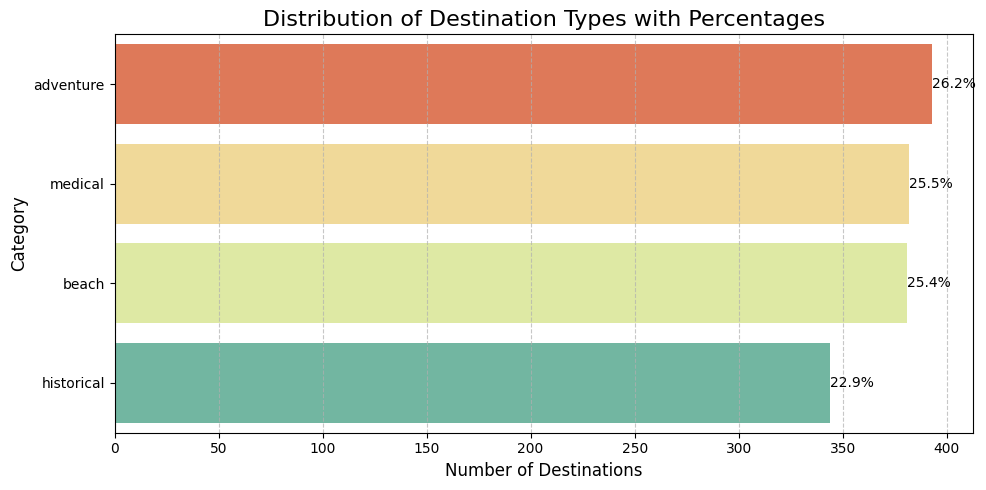

In [26]:
# distribution of destination categories
category_counts = destinations_df['category'].value_counts()
category_percentages = category_counts / len(destinations_df) * 100

plot_df = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_percentages.values
})

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Count', y='Category', data=plot_df, palette='Spectral')

for index, row in plot_df.iterrows():
    ax.text(row['Count'], index, f'{row['Percentage']:.1f}%', color='black', ha="left", va="center")

plt.title('Distribution of Destination Types with Percentages', fontsize=16)
plt.xlabel('Number of Destinations', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

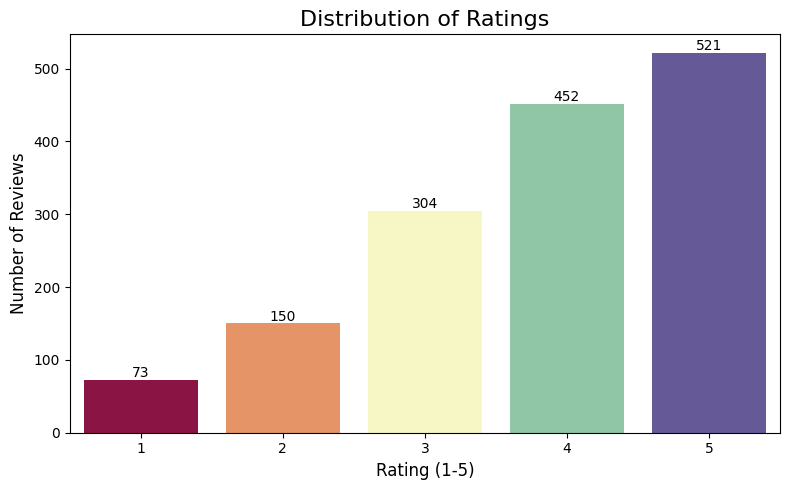

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='rate', data=reviews_df, palette='Spectral', hue='rate', legend=False)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Content-Based Recommendation Model

Content-based recommendations recommend destinations based on the attributes of the destination that the user has shown interest in based on the "Preferences" and "Type" columns.

### Prepare the Destination Features

Use the "Type", "City", and "BestTimeToVisit" columns to create features for content-based filtering

In [28]:
# Text-based feature for the destinations
df['features'] = df['category'] + ' ' + df['city'] + ' ' + df['best_time_to_visit'] + " " + df['preference']

# Apply TF-IDF vectorizer to create feature vectors for destinations
vectorizer = TfidfVectorizer(stop_words='english')
destination_features = vectorizer.fit_transform(df['features'])

# Compute cosine similarity between destinations
cosine_sim = cosine_similarity(destination_features, destination_features)

In [29]:
# Define recommendation function
def recommend_destinations(user_id, userhistory_df, destinations_df, cosine_sim):
    """
    Recommends top 5 destinations for a given user based on similarity scores.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Get the destinations the user has visited
    visited_destinations = userhistory_df[userhistory_df['user_id'] == user_id]['destination_id'].values

    # Calculate similarity scores for visited destinations
    similar_scores = np.sum(cosine_sim[visited_destinations - 1], axis=0)

    # Recommend the top 5 destinations the user hasn't visited yet
    recommended_destinations_idx = np.argsort(similar_scores)[::-1]

    recommendations = []
    for idx in recommended_destinations_idx:
        if destinations_df.iloc[idx]['place_id'] not in visited_destinations:
            # Append detailed information for each recommendation
            recommendations.append(destinations_df.iloc[idx][[
                'place_id', 'name', 'city', 'category', 'popularity', 'best_time_to_visit' ]].to_dict())
        if len(recommendations) >= 5:
            break

    # Convert recommendations to a DataFrame
    return pd.DataFrame(recommendations)

# Example: Recommend destinations for user with ID 1
recommended_destinations = recommend_destinations(1, userhistory_df, destinations_df, cosine_sim)

# Display recommendations
recommended_destinations

,place_id,name,city,category,popularity,best_time_to_visit
0,556,Majestic Coastal Park of Giza,Giza,beach,Medium,Spring-Fall
1,1292,Divine Thermal Baths of Asyut,Asyut,medical,Medium,Fall (Sep-Oct)
2,1291,Crystal Mosque of Dahab,Dahab,historical,Low,Winter (Nov-Feb)
3,1293,Dahab Church,Dahab,historical,High,Winter-Spring
4,723,Nuweiba Paragliding Spot,Nuweiba,adventure,High,Winter (Nov-Feb)


In [30]:
recommended_destinations = recommend_destinations(10, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

,place_id,name,city,category,popularity,best_time_to_visit
0,1009,Cairo Quad Biking Area,Cairo,adventure,High,Winter (Nov-Feb)
1,1008,Crystal Temple of Dahab,Dahab,historical,Medium,Winter-Spring
2,1010,Secret Snorkeling Spot of Alexandria,Alexandria,beach,High,Summer (Jun-Aug)
3,1007,Luxor Coastal Park,Luxor,beach,Low,Year-round
4,760,Royal Coptic Church of Luxor,Luxor,historical,High,Spring (Mar-May)


In [31]:
recommended_destinations = recommend_destinations(50, userhistory_df, destinations_df, cosine_sim)

recommended_destinations

,place_id,name,city,category,popularity,best_time_to_visit
0,448,Golden Nature Reserve of Mansoura,Mansoura,adventure,High,Oct-Apr
1,449,Zagazig Ancient Ruins,Zagazig,historical,Medium,Spring (Mar-May)
2,372,Minya Medical Tourism Center,Minya,medical,Low,Year-round
3,375,Hurghada Marina,Hurghada,beach,High,Summer (Jun-Aug)
4,373,Siwa Beach Resort,Siwa,beach,Medium,Spring-Fall


# Collaborative Filtering

In collaborative filtering, we recommend destinations based on the behavior and preferences of other similar users.

##  Create a User-Item Matrix

In [32]:
# Create a user-item matrix based on user history
user_item_matrix = userhistory_df.pivot(index='user_id', columns='destination_id', values='experience_rate')

# Fill missing values with 0 (indicating no rating/experience)
user_item_matrix.fillna(0, inplace=True)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

In [33]:
# Function to recommend destinations based on user similarity
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Find similar users
    similar_users = user_similarity[user_id - 1]

    # Get the top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]

    # Get the destinations liked by similar users
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)

    # Recommend the top 5 destinations
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

    # Filter the destinations DataFrame to include detailed information
    recommendations = destinations_df[destinations_df['place_id'].isin(recommended_destinations_ids)][[
        'place_id', 'name', 'city', 'category', 'popularity', 'best_time_to_visit'
    ]]

    return recommendations

# Example: Collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(1, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,place_id,name,city,category,popularity,best_time_to_visit
42,43,Secret Spa of Mansoura,Mansoura,medical,Medium,Winter-Spring
81,82,Aswan Pyramids,Aswan,historical,Medium,Winter-Spring
855,856,Ancient Beach Club of Fayoum,Fayoum,beach,Medium,Year-round
897,898,White Aquarium of Nuweiba,Nuweiba,beach,Low,Spring-Fall
1451,1452,Ismailia Health Retreat,Ismailia,medical,Medium,Winter-Spring


In [34]:
collaborative_recommendations = collaborative_recommend(10, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,place_id,name,city,category,popularity,best_time_to_visit
279,280,Sharm El Sheikh Hot Springs,Sharm El Sheikh,medical,High,Fall (Sep-Oct)
958,959,Kom Ombo Beach Resort,Kom Ombo,beach,Low,Year-round
1013,1014,Marsa Alam Healing Springs,Marsa Alam,medical,Medium,Year-round
1205,1206,Luxor Therapeutic Pool,Luxor,medical,High,Fall (Sep-Oct)
1342,1343,Blue Hot Springs of Siwa,Siwa,medical,Medium,Winter-Spring


In [35]:
collaborative_recommendations = collaborative_recommend(100, user_similarity, user_item_matrix, destinations_df)

collaborative_recommendations

,place_id,name,city,category,popularity,best_time_to_visit
396,397,Grand Camping Site of Giza,Giza,adventure,High,Oct-Apr
444,445,Hurghada Islamic Monument,Hurghada,historical,High,Oct-Apr
666,667,Siwa Temple,Siwa,historical,Low,Winter (Nov-Feb)
746,747,Paradise Beach Club of Edfu,Edfu,beach,Medium,Year-round
756,757,Zagazig Heritage Site,Zagazig,historical,Medium,Winter-Spring


# User input feature base recommendation

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using regressor for continuous target
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess the data
data = pd.read_csv('df.csv')

In [37]:
# Select relevant features with corrected column names
features = ['name_x', 'city', 'category', 'best_time_to_visit', 'preference', 'gender', 'NumOfAdults', 'NumOfChildren']
target = 'popularity'  # Predicting popularity, corrected to 'popularity'

# Map popularity levels to numerical values for the target variable
popularity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
data[target] = data[target].map(popularity_mapping)

# Encode categorical variables in features
label_encoders = {}
# Identify categorical columns first before modifying data in place
categorical_features_to_encode = [col for col in features if data[col].dtype == 'object']

for col in categorical_features_to_encode:
    le = LabelEncoder()
    # Fit the encoder on the unique values in the column
    le.fit(data[col])
    # Transform the column in the DataFrame
    data[col] = le.transform(data[col])
    label_encoders[col] = le

# Split the dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.13
R² Score: 0.76


In [39]:
# Prediction system
def recommend_destinations(user_input, model, label_encoders, features, data):
    # Encode user input
    encoded_input = {}
    for feature in features:
        # Ensure the feature exists in user_input
        if feature not in user_input:
            raise KeyError(f"Missing feature '{feature}' in user_input dictionary. Please ensure all required features are provided with correct keys.")

        if feature in label_encoders:
            # Use the stored label encoder to transform the input
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            # If no encoder, assume it's already numerical or not a categorical feature
            encoded_input[feature] = user_input[feature]

    # Convert to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity


# Example user input - Corrected keys to match the 'features' list
user_input = {
    'name_x': 'Paradise Hot Springs of Ismailia', # Example destination name (needs to be one the encoder has seen)
    'city': 'Ismailia',
    'category': 'medical',
    'best_time_to_visit': 'Year-round',
    'preference': 'adventure, beach, historical',
    'gender': 'male',
    'NumOfAdults': 2,
    'NumOfChildren': 1,
}

# Make a prediction
predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

# Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 2.19


In [46]:
import pickle

pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))